# Predictive modelling using Regression

## 1. What pre-processing was required on the dataset before regression modelling? What distribution split between training and test datasets was used?

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('D2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5789 non-null   object 
 1   age               5789 non-null   object 
 2   height            5789 non-null   int64  
 3   weight            5789 non-null   int64  
 4   blood_type        5789 non-null   object 
 5   insurance         5789 non-null   object 
 6   income            5789 non-null   object 
 7   smoking           5789 non-null   object 
 8   alcohol           5789 non-null   float64
 9   contacts_count    5789 non-null   float64
 10  working           5789 non-null   object 
 11  worried           5789 non-null   float64
 12  covid19_positive  5789 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 588.1+ KB


In [4]:
np.random.seed(42)
def pick_value(ratio, values):
    total_parts = sum(ratio)
    normalized_ratio = [part / total_parts for part in ratio]
    selected_value = np.random.choice(values, p=normalized_ratio)
    return selected_value

correct_blood_type_data = df.loc[df['blood_type'] != 'unknown', 'blood_type']
ratio = correct_blood_type_data.value_counts()/len(correct_blood_type_data)
ratio

blood_types = ratio.index.tolist()
ratio = ratio.values.tolist()

blood_types

ratio

# before:
df['blood_type'].value_counts()

blood_type
unknown    1884
ap         1279
op         1251
on          417
bp          394
an          244
abp         191
bn           91
abn          38
Name: count, dtype: int64

In [5]:
update_data = []
for _ in range(len(df.loc[df['blood_type'] == 'unknown'].index)):
    update_data.append(pick_value(ratio, blood_types))

df.loc[df['blood_type'] == 'unknown', 'blood_type'] = update_data

# check
df['blood_type'].value_counts()

blood_type
ap     1908
op     1839
on      614
bp      577
an      367
abp     287
bn      142
abn      55
Name: count, dtype: int64

In [6]:
print(df['contacts_count'].astype(int))
print(df['worried'].astype(int))
print(df['alcohol'].astype(int))

0        9
1        2
2        5
3        6
4        2
        ..
5784     3
5785    20
5786    20
5787    10
5788    21
Name: contacts_count, Length: 5789, dtype: int64
0       3
1       3
2       3
3       3
4       4
       ..
5784    4
5785    4
5786    3
5787    3
5788    4
Name: worried, Length: 5789, dtype: int64
0       0
1       0
2       2
3       2
4       2
       ..
5784    3
5785    2
5786    2
5787    2
5788    2
Name: alcohol, Length: 5789, dtype: int64


In [7]:
# One-hot encoding 
#df = pd.get_dummies(df, columns=['gender', 'blood_type', 'income', 'smoking', 'working'])
df = pd.get_dummies(df)


In [8]:
# target/input split
y = df['covid19_positive']
X = df.drop(['covid19_positive'], axis=1)

# Convert X into a numpy matrix 
X_mat = X.to_numpy()

# setting random state
rs = 10

# 70:30 splits our input data into 70% training and 30% testing
X_mat = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   height                       5789 non-null   int64  
 1   weight                       5789 non-null   int64  
 2   alcohol                      5789 non-null   float64
 3   contacts_count               5789 non-null   float64
 4   worried                      5789 non-null   float64
 5   gender_female                5789 non-null   bool   
 6   gender_male                  5789 non-null   bool   
 7   gender_other                 5789 non-null   bool   
 8   age_0_10                     5789 non-null   bool   
 9   age_100_110                  5789 non-null   bool   
 10  age_10_20                    5789 non-null   bool   
 11  age_20_30                    5789 non-null   bool   
 12  age_30_40                    5789 non-null   bool   
 13  age_40_50         

## c. Did you apply standardisation of variables? Why would you standardise the variables for regression mining?

In [10]:
#STANDARDISATION

from sklearn.preprocessing import StandardScaler

# initialise a standard scaler object
scaler = StandardScaler()

# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 110, max 238, mean 172.00 and std dev 10.93
Variable #1: min 44, max 180, mean 84.59 and std dev 23.10
Variable #2: min 0.0, max 14.0, mean 2.64 and std dev 3.09
Variable #3: min 0.0, max 21.0, mean 7.97 and std dev 6.79
Variable #4: min 1.0, max 5.0, mean 3.63 and std dev 0.73
After scaling
-------------
Variable #0: min -5.6731881981702275, max 6.039293583322545, mean -0.00 and std dev 1.00
Variable #1: min -1.7566695812374529, max 4.129715953323073, mean 0.00 and std dev 1.00
Variable #2: min -0.8547504201123084, max 3.6705208661341717, mean 0.00 and std dev 1.00
Variable #3: min -1.1740784926789536, max 1.9197121396460037, mean 0.00 and std dev 1.00
Variable #4: min -3.605808677507695, max 1.8684276511776476, mean -0.00 and std dev 1.00


## 2. Build a regression model using the default setting with all inputs. Build another regression model fine-tuned with GridSearchCV. Now, choose a better model to answer the followings:

## a. Explain why you chose that model.

### Training logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression(random_state=rs)

# fit it to training data
model.fit(X_train, y_train)

LogisticRegression(random_state=10)

## b. Name the regression function used.

Logistic regression

## f. What is the classification accuracy on training and test datasets?

In [32]:
# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.6952122408687068
Test accuracy: 0.6764536557282671
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1036
           1       0.62      0.53      0.57       701

    accuracy                           0.68      1737
   macro avg       0.66      0.65      0.65      1737
weighted avg       0.67      0.68      0.67      1737



The training accuracy is slightly higher than the test accuracy which may indicate slight overfitting.

###  Understanding the logistic regression model

In [14]:
print(model.coef_)

[[-0.21185621  0.29912377  0.06377936  0.00577002  0.11525667 -0.06555993
   0.06106061  0.04518083  0.00040115  0.2149378   0.04444383  0.12206007
   0.06171958  0.01325253  0.02683157 -0.18378598 -0.16743804  0.00537851
   0.02876677 -0.01276358 -0.00629796 -0.02792537  0.0354475  -0.03945312
   0.01184267 -0.03737559  0.03737559  0.07524694 -0.37163467 -0.01931859
   0.34507214 -0.03905182  0.01781423  0.08602131 -0.09643629  0.02899024
   0.1139903  -0.03496033  0.02300541 -0.13080235  0.01075426 -0.037878
   0.21929622 -0.13514274]]


In [15]:
feature_names = X.columns
coef = model.coef_[0]

# limit to 20 features
coef = coef[:20]

for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

height : -0.21185621340705132
weight : 0.29912376944423785
alcohol : 0.06377936376707834
contacts_count : 0.005770024030960999
worried : 0.11525666680643261
gender_female : -0.06555993408113624
gender_male : 0.06106060607716563
gender_other : 0.045180833479701366
age_0_10 : 0.00040115268052867285
age_100_110 : 0.21493780140591234
age_10_20 : 0.044443832825916976
age_20_30 : 0.12206007226656707
age_30_40 : 0.061719583094594056
age_40_50 : 0.013252534009272197
age_50_60 : 0.02683156747206253
age_60_70 : -0.183785977303037
age_70_80 : -0.16743803977314584
blood_type_abn : 0.0053785107489012106
blood_type_abp : 0.02876676987952019
blood_type_an : -0.012763578789914597


- Positive coefficient means positive change in the input feature has positive correlation to the prediction value. 
- Negative coefficient does the reverse. 

## e. Report the top-5 important variables (in the order) in the model.

In [16]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 5 features, you can leave this out to print out everything
indices = indices[:5]

for i in indices:
    print(feature_names[i], ':', coef[i])

income_high : -0.37163466819399765
income_med : 0.34507214267064606
weight : 0.29912376944423785
working_travel critical : 0.21929622479993627
age_100_110 : 0.21493780140591234


### Finding optimal hyperparameters with GridSearchCV

In [17]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=10), n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             return_train_score=True)

In [18]:
result_set = cv.cv_results_
print(result_set)

{'mean_fit_time': array([0.01131074, 0.00572736, 0.00383623, 0.00427868, 0.00511584,
       0.00489533, 0.00562646, 0.00531404, 0.00619371, 0.00670888]), 'std_fit_time': array([0.00952605, 0.00195644, 0.0009557 , 0.00197799, 0.00208475,
       0.00150257, 0.0015947 , 0.0014105 , 0.0019528 , 0.00125547]), 'mean_score_time': array([0.00046074, 0.00039015, 0.00041196, 0.00046771, 0.00027347,
       0.00046902, 0.00029058, 0.00028145, 0.00034049, 0.00035243]), 'std_score_time': array([1.45362783e-04, 1.67489322e-04, 2.04560930e-04, 4.81284680e-04,
       3.57306654e-05, 4.88665767e-04, 5.59126694e-05, 7.59464224e-05,
       2.10021909e-04, 2.01690896e-04]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C

Total number of models:  10


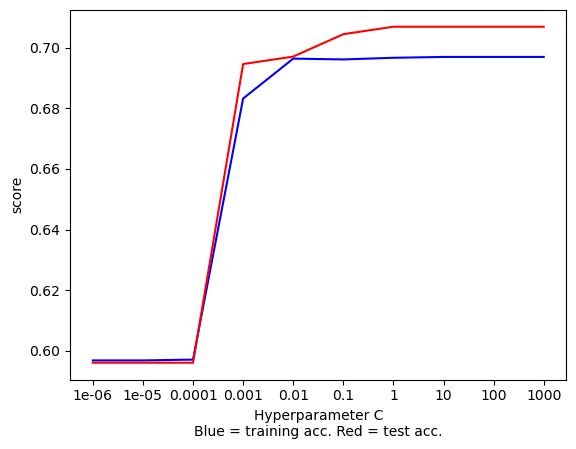

In [19]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


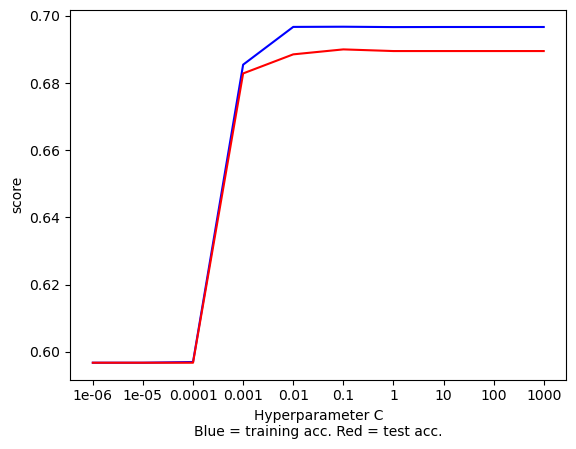

In [20]:
import matplotlib.pyplot as plt

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [21]:
print(cv.best_params_)

{'C': 0.1}


In [22]:
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

Train accuracy: 0.6954590325765054
Test accuracy: 0.6758779504893494


### Default model
- Train accuracy: 0.6952122408687068
- Test accuracy: 0.6764536557282671
    
### Gridsearch CV
- Train accuracy: 0.6954590325765054
- Test accuracy: 0.6758779504893494

### Out of the two models, we opted for the default model, as it has higher test accuracy of 67.64% as compared to the GridSearchCV, with test accuracy of 67.58%

In [23]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 44
Number of features after elimination 26


In [24]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

## e. Report the top-3 important variables (in the order) in the model.

In [49]:
# grab feature importances from the model and feature name from the original X
rfe_coef = rfe.estimator_.coef_[0]
rfe_feature_names = X.columns[rfe.support_]

# sort them out in descending order
rfe_indices = np.argsort(np.absolute(rfe_coef))
rfe_indices = np.flip(rfe_indices, axis=0)

# limit to 3 features
rfe_indices = rfe_indices[:3]

for i in rfe_indices:
    print(rfe_feature_names[i], ':', rfe_coef[i])

income_med : 0.3848220352340608
income_high : -0.33777085782615407
weight : 0.29264421391379974


## What is the classification accuracy on training and test datasets?

In [51]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))

y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(rfe_cv.best_params_)

Train accuracy: 0.6961994076999013
Test accuracy: 0.6735751295336787
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1036
           1       0.61      0.51      0.56       701

    accuracy                           0.67      1737
   macro avg       0.66      0.65      0.65      1737
weighted avg       0.67      0.67      0.67      1737

{'C': 0.01}


## Report any sign of overfitting in this model.

Though train accuracy is slightly higher than test accuracy, slight overfitting is observed but it is a small difference.

## 4. Produce the ROC curve for all different regression models. Using the best regression model, can you identify which individuals could potentially be "COVID positive"? Provide the general characteristics of those individuals.

Models built:
- default logistic regression
- logistic regression gridsearchCV
- logistic regression RFECV

In [52]:
from sklearn.metrics import roc_auc_score

y_pred_proba_lr = model.predict_proba(X_test)
y_pred_proba_lr_cv = cv.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_sel)


roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])

print("ROC index on test for defaultmodel:", roc_index_lr)
print("ROC index on test for gridsearchcv:", roc_index_lr_cv)
print("ROC index on test for rfe_cv:", roc_index_rfe_cv)

ROC index on test for defaultmodel: 0.7206459057386305
ROC index on test for gridsearchcv: 0.7207367852874272
ROC index on test for rfe_cv: 0.7197013092162878


In [53]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])

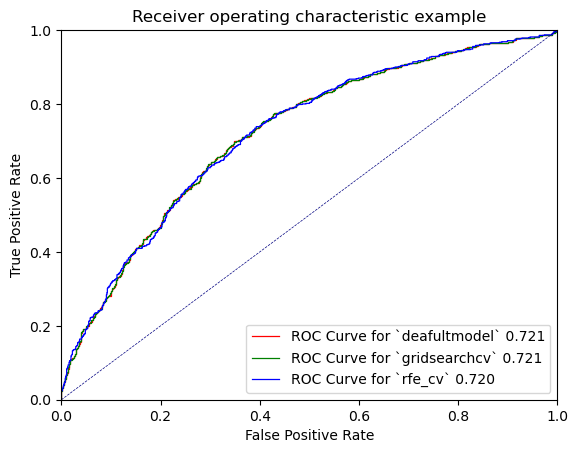

In [54]:
import matplotlib.pyplot as plt

plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `deafultmodel` {:.3f}'.format(roc_index_lr), color='red', lw=0.9)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for `gridsearchcv` {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.9)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `rfe_cv` {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.9)



plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### GRIDSEARCH MODEL SHOWS THE HIGHEST ACCURACY

In [55]:
alpha = model.intercept_
print(alpha)

[-0.48844379]


In [59]:
#for i in range(len(coef)):
    #print(feature_names[i], ':', coef[i])

In [58]:
# Assuming the best model after GridSearchCV is 'cv'

# Get the coefficients from the fine-tuned logistic regression model
coef = cv.best_estimator_.coef_[0]
feature_names = X.columns

# Print the intercept
intercept = cv.best_estimator_.intercept_
print("Intercept:", intercept)

# Print all the coefficients with their corresponding feature names
for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

# If you want to print only positive and negative impact features separately
positive_features = {feature_names[i]: coef[i] for i in range(len(coef)) if coef[i] > 0}
negative_features = {feature_names[i]: coef[i] for i in range(len(coef)) if coef[i] < 0}

print("\nGeneral characteristics of potentially COVID-positive individuals:")
print("Positive impact features:", positive_features)
print("Negative impact features:", negative_features)


Intercept: [-0.48862993]
height : -0.2052552413935823
weight : 0.29418212124956333
alcohol : 0.0630501137255155
contacts_count : 0.006970123511954421
worried : 0.11446861192513157
gender_female : -0.06315130740554625
gender_male : 0.05870565181073989
gender_other : 0.04464506921998677
age_0_10 : 0.0011001621543741092
age_100_110 : 0.15281586870185482
age_10_20 : 0.04380628027205299
age_20_30 : 0.12125670402521184
age_30_40 : 0.06184879166858939
age_40_50 : 0.0137479912786519
age_50_60 : 0.027272689546163627
age_60_70 : -0.1806666193439238
age_70_80 : -0.16382068151620433
blood_type_abn : 0.005226274801522152
blood_type_abp : 0.028683765985590238
blood_type_an : -0.012615902159454672
blood_type_ap : -0.0063938558922785466
blood_type_bn : -0.027451146888305623
blood_type_bp : 0.03510444435998309
blood_type_on : -0.039029824515145424
blood_type_op : 0.011707487703656148
insurance_no : -0.037020580895553636
insurance_yes : 0.03702058089555366
income_gov : 0.07445327513636181
income_high : 

### General Characteristics of Potentially COVID-Positive Individuals:
Positive Impact Features (Increase the likelihood of being COVID-positive):

- Weight: Higher weight is associated with a higher likelihood of being COVID-positive.
- Alcohol Consumption: Higher alcohol consumption increases the likelihood.
- Contacts Count: Higher number of contacts increases the likelihood.
- Worried: Individuals who are more worried about COVID-19 are more likely to test positive.
- Gender (Other): Individuals identifying as gender other have a higher likelihood.
- Age Groups:
- 0-10 years: Slightly higher likelihood.
- 100-110 years: Significantly higher likelihood.
- 10-20 years: Slightly higher likelihood.
- 20-30 years: Higher likelihood.
- 30-40 years: Slightly higher likelihood.
- 40-50 years: Slightly higher likelihood.
- 50-60 years: Slightly higher likelihood.
Blood Types:
- AB-: Slightly higher likelihood.
- AB+: Higher likelihood.
- B+: Higher likelihood.
- O+: Slightly higher likelihood.
- Insurance Status: Having insurance is associated with a higher likelihood.
Income:
- Government income: Higher likelihood.
- Medium income: Higher likelihood.

Smoking Status:
- Recently quit smoking (quit within 10 years): Higher likelihood.
- Heavy smoker: Higher likelihood.

Working Conditions:
- Travel critical work: Higher likelihood.
- Negative Impact Features (Decrease the likelihood of being COVID-positive):

Height: Higher height is associated with a lower likelihood of being COVID-positive.
Gender (Female): Being female is associated with a lower likelihood.
Older Age Groups:
- 60-70 years: Lower likelihood.
- 70-80 years: Lower likelihood.

Blood Types:
- A-: Slightly lower likelihood.
- A+: Slightly lower likelihood.
- B-: Slightly lower likelihood.
- O-: Lower likelihood.
Insurance Status: Not having insurance is associated with a lower likelihood.
Income:
- High income: Lower likelihood.
- Low income: Slightly lower likelihood.
Smoking Status:
- Never smoked: Lower likelihood.
- Quit smoking 5 years ago: Lower likelihood.
- Light smoker: Lower likelihood.
Working Conditions:
- Working from home: Lower likelihood.
- Stopped working: Lower likelihood.
- Travel non-critical work: Lower likelihood.

### Individuals with higher weight, higher alcohol consumption, more contacts, and those who are more worried about COVID-19 are more likely to be COVID-positive. Certain age groups (younger and very old), specific blood types (like AB+), and certain working conditions (travel critical) also increase the likelihood. On the other hand, higher height, being female, older age groups (60-80 years), specific blood types (like O-), higher income, and working from home are associated with a lower likelihood of being COVID-positive.